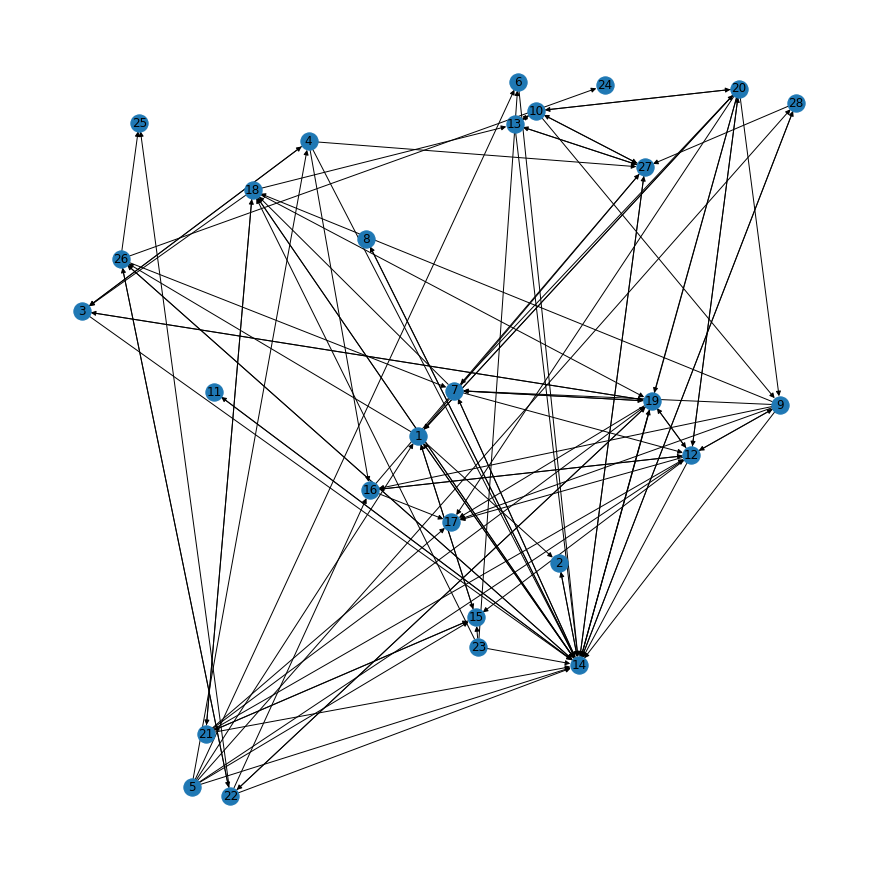

In [2]:
import networkx as nx
import pandas as pd
import numpy as np

import urllib
import json
import operator

import matplotlib as plot
import matplotlib.pyplot as plt
import seaborn as sn


df = pd.read_csv ('resources/Atts_agroconcept_survey.csv',index_col=False,header=0)
df_edges = pd.read_csv ('resources/Edges_complete.csv',index_col=False,header=0)
#create a new column ccmm_score that averages all of the self_* columns
df['ccmm_score']= (df['self_reduc']+df['self_act']+df['self_cap']+df['self_conf']+df['self_not'])/5
#print(df['ego_id'],df['ccmm_score'])
df_raw = pd.read_csv ('resources/rawdata_new.csv',index_col=False,header=0)
#get list of nodes in network name1
nodes_in_name1=[]
nodes_with_edges=[]
nodes_with_edges = df_edges['sender_id'].unique().tolist()

df_raw = df_raw[~df_raw['id'].isin(nodes_with_edges)]
for i in df.index:
    if df['net_name1_neigh'][i] == 1 or df['net_name1_work'][i] == 1 or df['net_name1_frien'][i] == 1 or df['net_name1_fam'][i] == 1 or df['net_name1_part'][i] == 1 or df['net_name1_club'][i] == 1  or df['net_name1_vet'][i] == 1 or df['net_name1_ext'][i] == 1 or df['net_name1_oth'][i] == 1 :
        nodes_in_name1.append(df['ego_id'][i])

G = nx.from_pandas_edgelist(df_edges, source='sender_id', target='receiver_id', edge_attr=["advice_freq"],create_using=nx.DiGraph())

plt.figure(3,figsize=(12,12)) 
nx.draw_random(G,with_labels=True)
plt.show()


In [3]:
#calculate measured mitigation
farmtype = df['farmtype'].unique().tolist()
#print(farmtype)
df['mitigation_measure']=0
for i in df.index:
    mm_total=0
    if df['legum'][i] == 1 :
        mm_total+=1
    if df['conc'][i] == 1 :
        mm_total+=1
    if df['add'][i] == 1 :
        mm_total+=1
    if df['lact'][i] == 1 :
        mm_total+=1
    if df['breed'][i] == 1 :
        mm_total+=1
    if df['covman'][i] == 1 :
        mm_total+=1
    if df['comp'][i] == 1 :
        mm_total+=1
    if df['drag'][i] == 1 :
        mm_total+=1
    if df['cov'][i] == 1 :
        mm_total+=1
    if df['plough'][i] == 1 :
        mm_total+=1
    if df['solar'][i] == 1 :
        mm_total+=1
    if df['biog'][i] == 1 :
        mm_total+=1
    if df['ecodr'][i] == 1 :
        mm_total+=1
    df['mitigation_measure'][i] = mm_total/13
print(df['mitigation_measure'] )
print("mean ",df['mitigation_measure'].mean())

0     0.538462
1     0.461538
2     0.230769
3     0.538462
4     0.307692
5     0.153846
6     0.230769
7     0.461538
8     0.461538
9     0.384615
10    0.384615
11    0.461538
12    0.384615
13    0.769231
14    0.461538
15    0.307692
16    0.461538
17    0.153846
18    0.076923
19    0.538462
20    0.153846
21    0.230769
22    0.384615
23    0.461538
24    0.307692
Name: mitigation_measure, dtype: float64
mean  0.3723076923076924
